In [1]:
import pandas as pd
import matplotlib
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd


In [2]:
df = pd.read_csv('/kaggle/input/netflix-shows/netflix_titles.csv')

In [3]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [4]:
df.info()
df.isnull().sum()

df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

df['rating'] = df['rating'].fillna('Not Rated')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


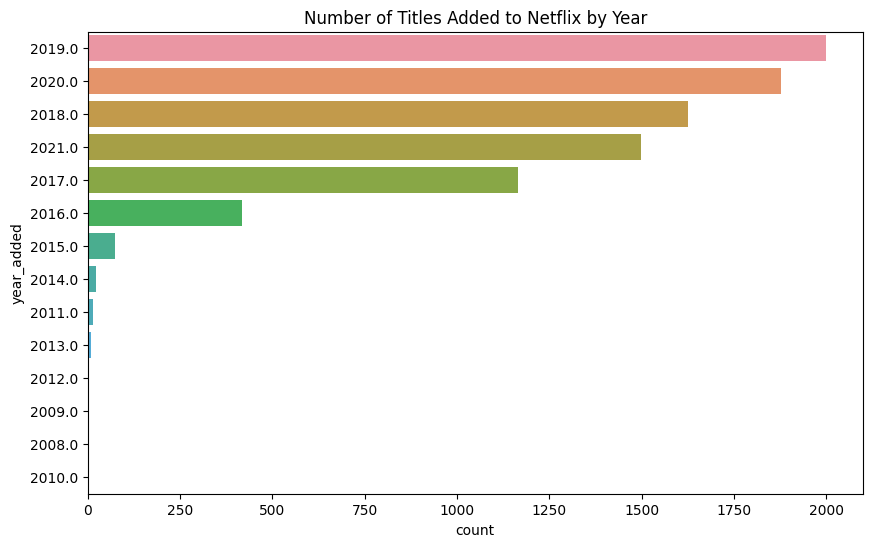

In [5]:
df['year_added'] = df['date_added'].dt.year
plt.figure(figsize=(10, 6))
sns.countplot(y='year_added', data=df, order=df['year_added'].value_counts().index)
plt.title("Number of Titles Added to Netflix by Year")
plt.show()

In [6]:
df['year_added'] = df['date_added'].dt.year
df_clean = df[df['year_added'].notnull()]

cumulative_years = df_clean.groupby('year_added').size().cumsum().reset_index(name='Cumulative Titles')

fig = px.scatter(cumulative_years,
                 x='year_added',
                 y='Cumulative Titles',
                 size='Cumulative Titles',
                 color='year_added',
                 animation_frame='year_added',
                 range_x=[df_clean['year_added'].min(), df_clean['year_added'].max()],
                 range_y=[0, cumulative_years['Cumulative Titles'].max()+500],
                 title='Animated Growth of Netflix Titles by Year',
                 labels={'year_added': 'Year', 'Cumulative Titles': 'Total Titles'})

fig.update_layout(showlegend=False)
fig.show()


In [7]:
fig.write_html("/kaggle/working/netflix_growth_dashboard.html")

In [8]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

df = df[df['date_added'].notnull()]

df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month
df['month_name'] = df['date_added'].dt.strftime('%B')


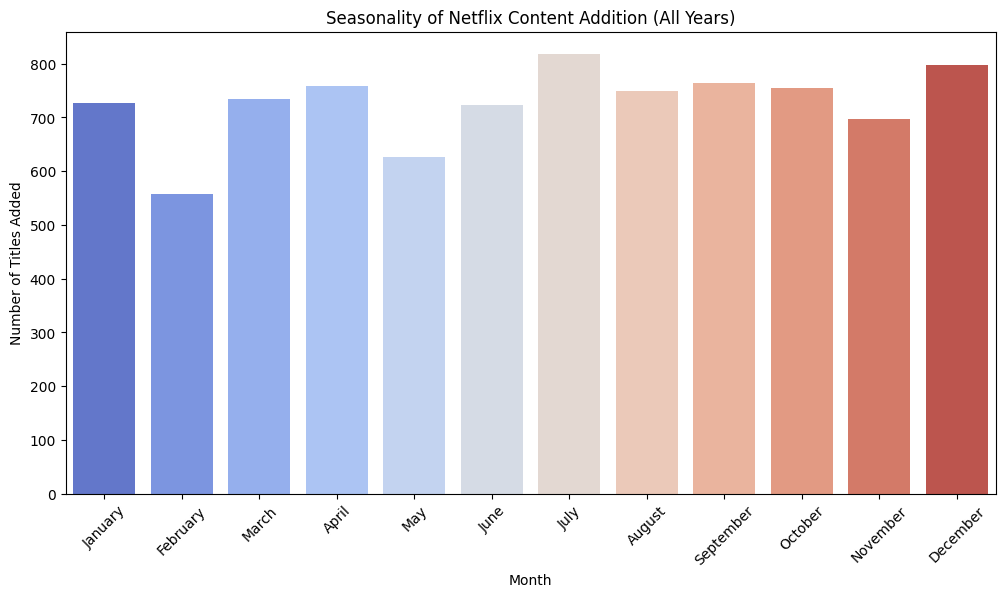

In [9]:

month_counts = df['month_name'].value_counts().reindex(
    ['January','February','March','April','May','June','July','August','September','October','November','December']
)

plt.figure(figsize=(12,6))
sns.barplot(x=month_counts.index, y=month_counts.values, palette='coolwarm')
plt.title('Seasonality of Netflix Content Addition (All Years)')
plt.xlabel('Month')
plt.ylabel('Number of Titles Added')
plt.xticks(rotation=45)
plt.show()


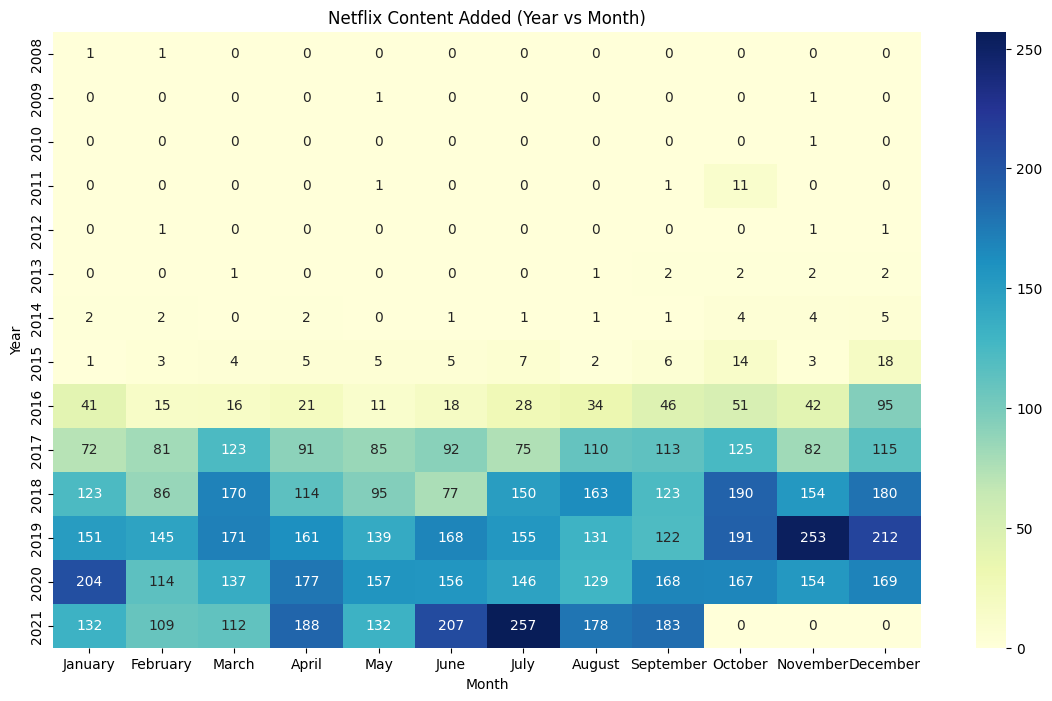

In [10]:
heatmap_data = df.groupby(['year_added', 'month_name']).size().unstack(fill_value=0)
heatmap_data = heatmap_data.reindex(columns=['January','February','March','April','May','June','July','August','September','October','November','December'])

plt.figure(figsize=(14,8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='d')
plt.title('Netflix Content Added (Year vs Month)')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()